# Form Recognizer

- [Documentation liée à Form Recognizer](https://docs.microsoft.com/fr-fr/azure/applied-ai-services/form-recognizer/overview?tabs=v2-1#input-requirements)
- [Analyse des reçus avec Form Recognizer](https://docs.microsoft.com/fr-fr/learn/modules/analyze-receipts-form-recognizer/)
- [Générer une URL SAS](https://docs.microsoft.com/fr-fr/azure/applied-ai-services/form-recognizer/how-to-guides/try-sdk-rest-api?pivots=programming-language-csharp#train-a-custom-model)

### Présentation

Form Recognizer utilise les capacités de l'OCR (Optical Character Recognition) et des modèles de deep learning pour extraire du texte, des associations clé-valeur, des marques de sélection, et des tableaux à partir de documents.

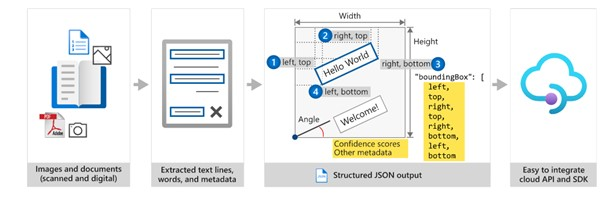
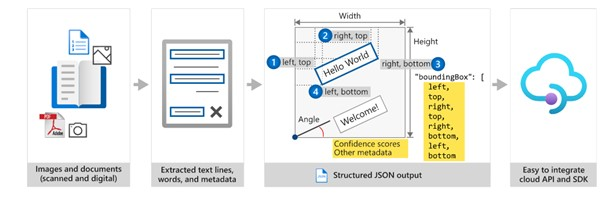

L'OCR capture la structure du document en créant des rectangles englobants autour des objets détectés dans une image. Les emplacements des rectangles englobants sont enregistrés en tant que coordonnées par rapport au reste de la page. Les services Form Recognizer retournent les données de rectangles englobants et d’autres informations sous une forme structurée avec les relations du fichier d’origine.

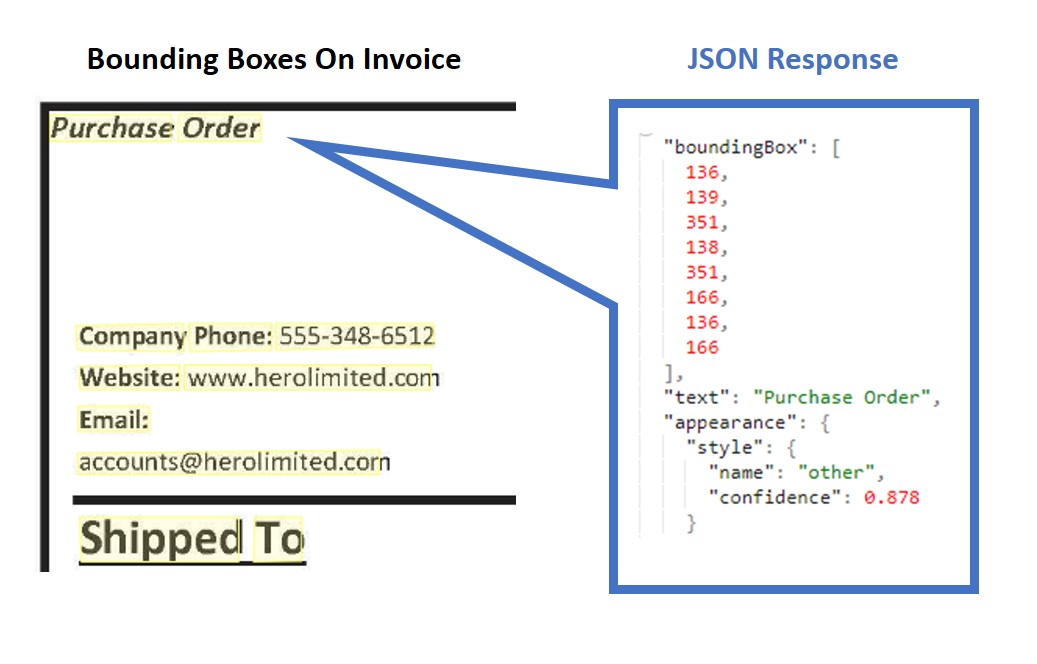
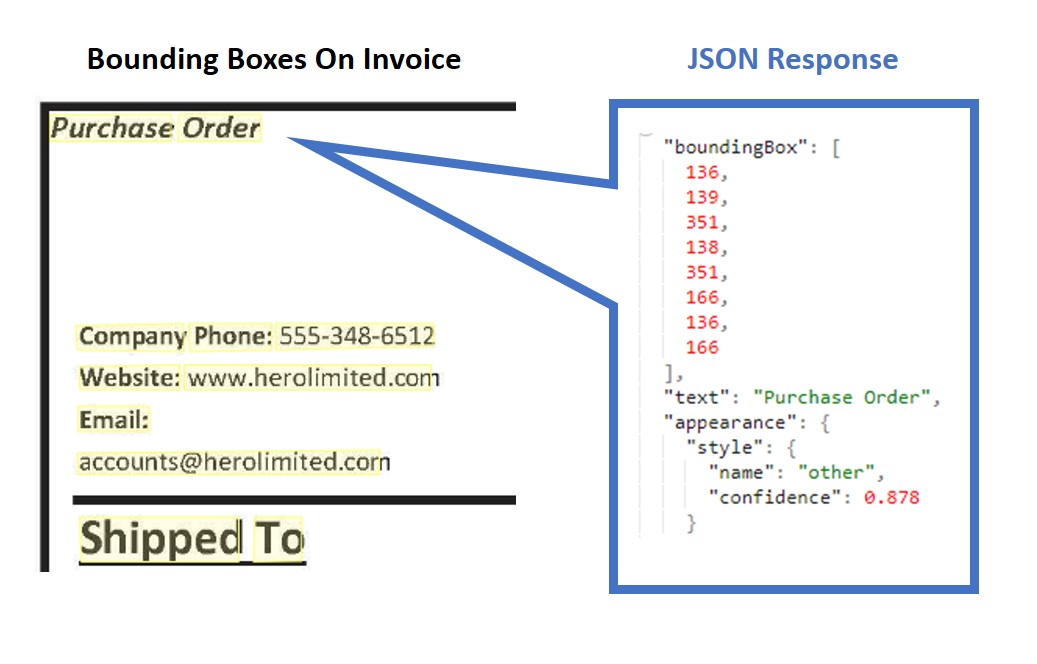

On peut accéder aux services Form Recognizer avec une API REST ou des SDK de la bibliothèque cliente pour intégrer les services dans votre workflow ou votre application. Aussi, les services Form Recognizer sont pris en charge par une interface utilisateur appelée FOTT (Form OCR Test Tool) qui peut effectuer l’extraction de la disposition et la formation du modèle.

### Bien commencer avec Form Recognizer

Pour démarrer un projet avec les services Form Recognizer, vous devez préparer les éléments suivants :

- Abonnement à une ressource
- Sélection de fichiers de formulaire pour l’extraction de données


Form Recognizer fonctionne sur les documents d’entrée qui répondent aux critères suivants :

- Format JPG, PNG, PDF (texte ou numérisé) ou TIFF.
- La taille du fichier doit être inférieure à 50 Mo.
- Les dimensions des images doivent être comprises entre 50 x 50 et 10 000 x 10 000 pixels.
- La taille totale du jeu de données d’apprentissage doit être de 500 pages maximum.


Une fois que vous avez collecté vos fichiers, déterminez ce que vous devez accomplir.

- Pour utiliser les fonctionnalités de reconnaissance optique de caractères afin de capturer la disposition d’un formulaire, utilisez [le service de disposition](https://docs.microsoft.com/fr-fr/azure/applied-ai-services/form-recognizer/concept-layout). L’API de disposition extrait avec précision la sortie structurée des documents.
- Pour créer une application qui extrait des données à partir de reçus, de cartes de visite ou de factures, utilisez un modèle prédéfini. Ces modèles n’ont pas besoin d’être formés. Les services Form Recognizer analysent les documents et retournent une sortie JSON.
- Pour créer une application afin d’extraire des données de formulaires spécifiques à votre secteur d’activité, créez un modèle personnalisé. Ce modèle doit être formé sur des exemples de documents. Après la formation, le modèle personnalisé peut analyser de nouveaux documents et retourner une sortie JSON.

### Comprendre les modèles prédéfinis

Form Recognizer comprend des modèles prédéfinis que vous pouvez utiliser pour les tâches d’extraction de formulaires courantes.

##### Reçus

Le modèle prédéfini pour les reçus vous permet d’extraire les champs de reçus courants, notamment :

    MerchantName
    MerchantAddress
    MerchantPhoneNumber
    TransactionDate
    TransactionTime
    Éléments
    Quantité
    Nom
    TotalPrice
    Sous-total
    Taxe
    Conseil
    Total

Voici quelques exemples d’utilisation du modèle de reçu :

- Simplification des processus de création de rapports sur les dépenses professionnelles
- Automatisation des tâches d’audit et de comptabilité
- Analyse du comportement du consommateur et des tendances d’achat

##### Factures (en preview)

Le modèle prédéfini pour les factures extrait le texte et les tables, et identifie les champs nommés tels que :

    CustomerName
    CustomerId
    PurchaseOrder
    InvoiceId
    InvoiceDate
    DueDate
    VendorName
    VendorAddress
    VendorAddressRecipient
    CustomerAddress
    CustomerAddressRecipient
    BillingAddress
    BillingAddressRecipient
    ShippingAddress
    ShippingAddressRecipient
    SubTotal
    TotalTax
    InvoiceTotal
    AmountDue
    ServiceAddress
    ServiceAddressRecipient
    RemittanceAddress
    RemittanceAddressRecipient
    ServiceStartDate
    ServiceEndDate
    PreviousUnpaidBalance

Voici quelques exemples d’utilisation du modèle de facture :

- Traitement de la paperasserie en temps réel
- Accélération de l’accès aux données fiables

##### Cartes de visite (en preview)

Le modèle prédéfini pour les cartes de visite extrait des informations telles que :

    ContactNames
    FirstName
    LastName
    CompanyNames
    Departments
    JobTitles
    E-mails
    Sites web
    Adresses
    MobilePhones
    Télécopies
    WorkPhones
    OtherPhones

Voici quelques exemples d’utilisation du modèle de carte de visite :

- Extraction de coordonnées à partir de cartes de visite pour créer rapidement des contacts téléphoniques
- Création automatique de contacts à partir d’images pour intégrer des données à un système CRM
- Suivi des prospects

### Modèles personnalisés et non supervisés

Si les modèles prédéfinis ne fournissent pas ce dont vous avez besoin, vous pouvez utiliser Form Recognizer pour effectuer la formation d’un modèle personnalisé basé sur vos propres exemples de formulaires.

La façon la plus simple de former un modèle personnalisé consiste à utiliser une technique d’apprentissage non supervisée dans laquelle vous formez le modèle à l’aide d’exemples de formulaires sans étiquettes. Le service de disposition de Form Recognizer analyse les formulaires pour déterminer la disposition du texte et détecte les paires clé-valeur et les tables qui contiennent les données de formulaire. Ces informations de mappage de la disposition et du champ sont ensuite utilisées pour former un modèle capable d’extraire des données à partir de formulaires similaires.

Pour former un modèle avec des exemples de formulaires sans étiquettes :

- Chargez au moins 5 exemples d’images ou de formulaires PDF dans un conteneur blob Stockage Azure à utiliser pour la formation.
- Générez une URL de sécurité d’accès partagé (SAS) pour le conteneur.
- Utilisez la fonction d’API REST Former un modèle personnalisé (ou une méthode équivalente du SDK) pour commencer la formation à l’aide des formulaires, en transmettant l’URL SAS pour le conteneur.
- Utilisez la fonction d’API REST Obtenir un modèle personnalisé (ou une méthode équivalente du SDK) pour obtenir l'ID du modèle formé

### Modèles personnalisés et supervisés

La formation d’un modèle Form Recognizer personnalisé avec des formulaires sans étiquettes fournit souvent des résultats appropriés. Toutefois, si votre formulaire est complexe ou si vous devez définir des mappages de champs explicites, vous pouvez utiliser une approche de formation supervisée et former votre modèle à l’aide de formulaires étiquetés.

La formation supervisée requiert une entrée de documents de formulaire et de documents JSON.

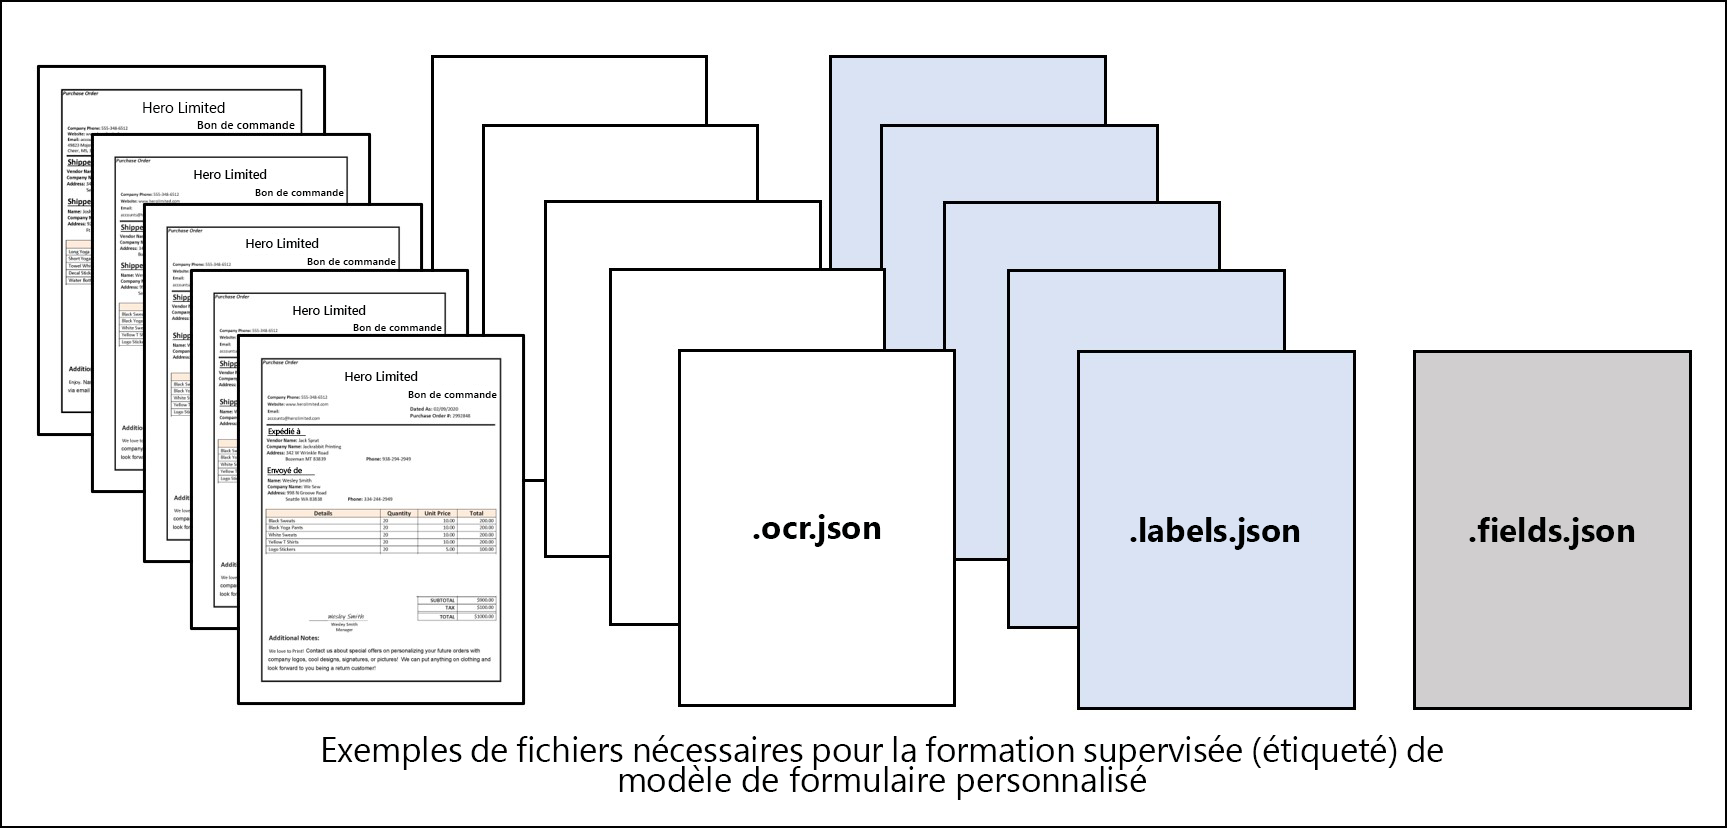
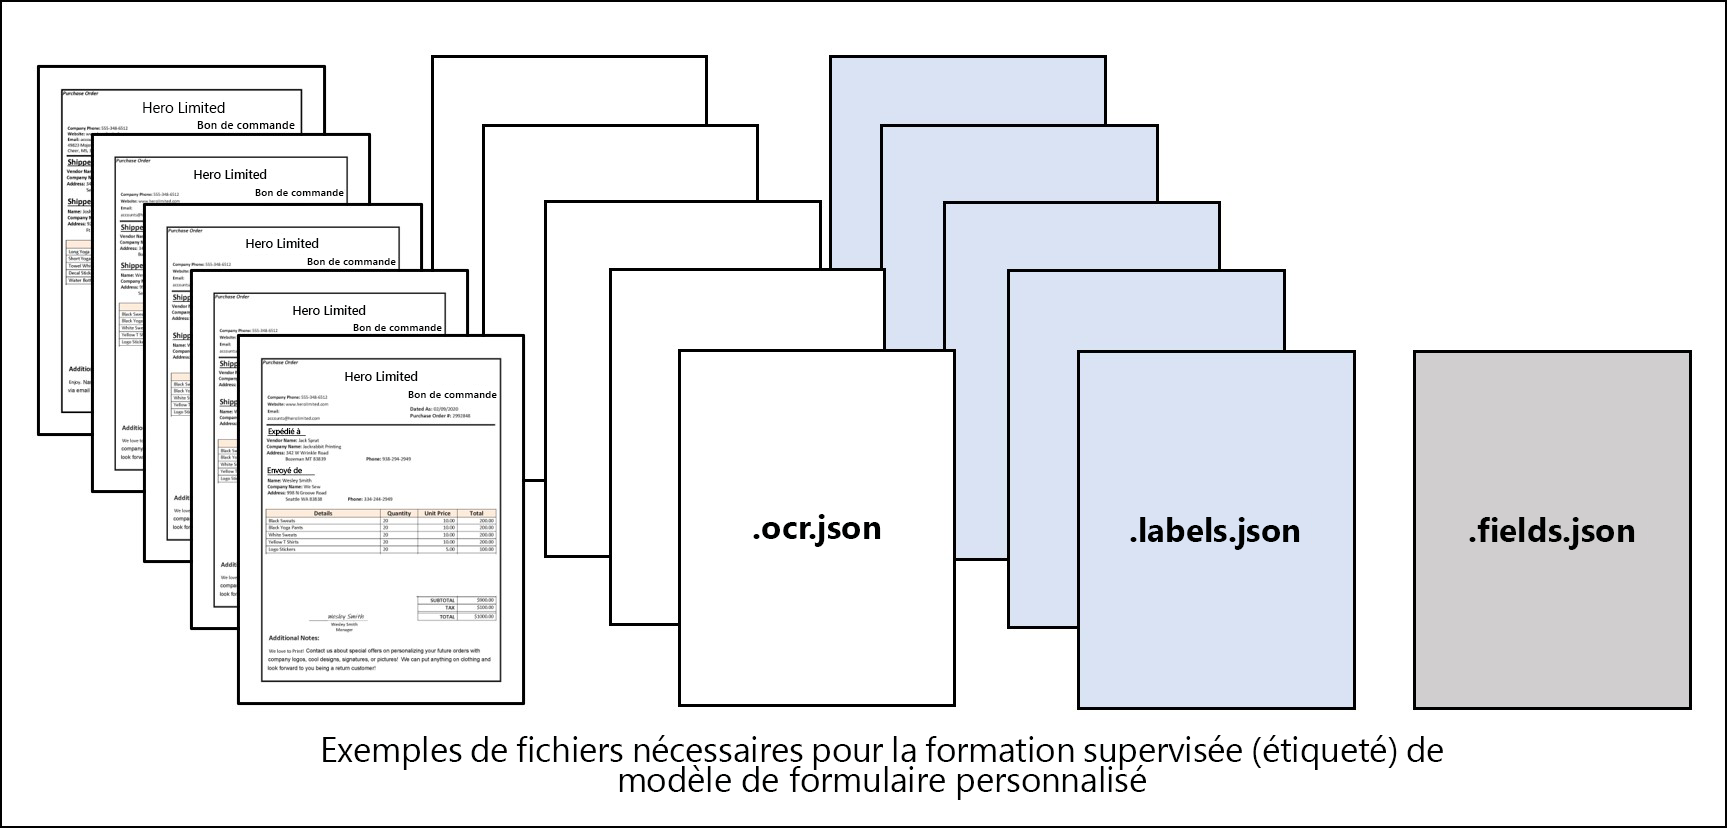

Pour former un modèle personnalisé à l’aide d’exemples de formulaires étiquetés :

- Stockez des exemples de formulaires dans un conteneur blob Azure, ainsi que des fichiers JSON contenant des informations sur les champs de disposition et d’étiquette.
    - Vous pouvez générer un fichier ocr.json pour chaque exemple de formulaire à l’aide de la fonction Analyser la disposition de Form Recognizer. En outre, vous avez besoin d’un seul fichier fields.json décrivant les champs que vous souhaitez extraire et d’un fichier labels.json pour chaque exemple de formulaire mappant les champs à leur emplacement dans ce formulaire.
- Générez une URL de sécurité d’accès partagé (SAS) pour le conteneur.
- Utilisez la fonction d’API REST Former un modèle personnalisé (ou une méthode équivalente du SDK) avec le paramètre useLabelFile défini sur true pour former le modèle.
- Utilisez la fonction d’API REST Obtenir un modèle personnalisé (ou une méthode équivalente du SDK) pour obtenir l’ID du modèle formé.


OU
- Utilisez l’outil d’exemple d’étiquetage (Sample Labeling Tool) pour étiqueter et former.

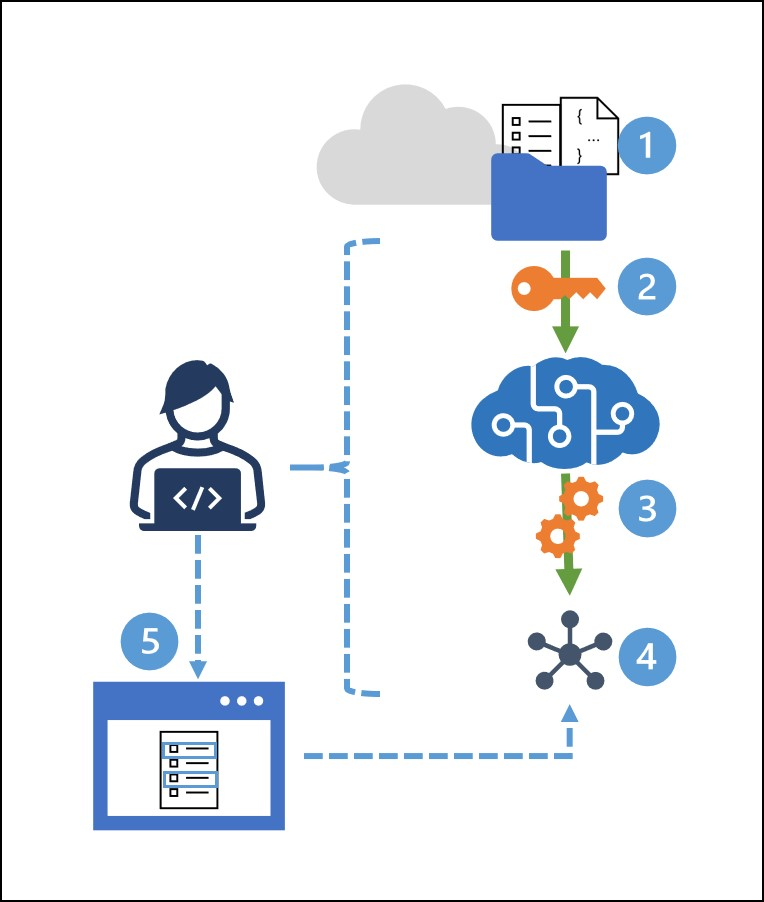
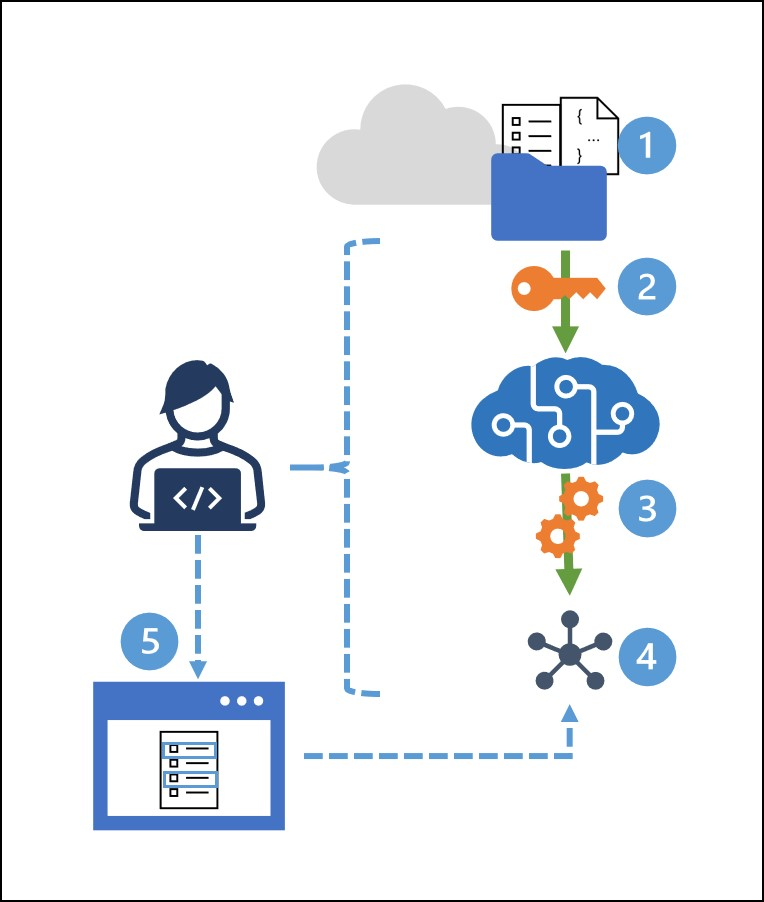